In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#reading dataset
from scipy.io import loadmat
import matplotlib.cm as cm
raw_data = loadmat('./hw5-data.mat') 
X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

In [24]:
#give a random C and gamma to see prediction
from sklearn.svm import SVC
model1 = SVC(kernel = 'rbf',C = 1,gamma = 1)
model1.fit(X,y)
model1.score(X,y)
predicted = model1.predict(Xval)

In [25]:
predicted

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0], dtype=uint8)

In [26]:
print(model1.score(X,y))

0.919431279620853


In [27]:
#define a data plot function
def plotData(X, y, title):
    y = y.ravel()
    pos = y==1
    neg = y==0

    plt.title(title)
    plt.plot(X[:,0][pos], X[:,1][pos], "k+")
    plt.plot(X[:,0][neg], X[:,1][neg], "yo")
    plt.show()

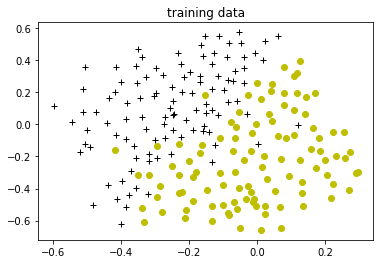

In [28]:
#test plot function
plotData(X,y,"training data")

In [29]:
from sklearn import svm
sigma = [0.01,0.03,0.1,0.3,1,3,10,30,100]
C = [0.01,0.03,0.1,0.3,1,3,10,30,100]


errors = list()
sigma_c = list()

for each in sigma:
    for each_c in C:
        clf = svm.SVC(kernel = 'rbf',gamma = 1/(2*each**2),C = each_c,decision_function_shape = 'ovr')
        clf.fit(X,y.ravel())
        errors.append(clf.score(Xval,yval.ravel()))
        sigma_c.append((each,each_c))


index = np.argmax(errors)

sigma_max,c_max = sigma_c[index]

print('The best sigma is:{}'.format(sigma_max))
print('The best C is :{}'.format(c_max))

The best sigma is:0.1
The best C is :1


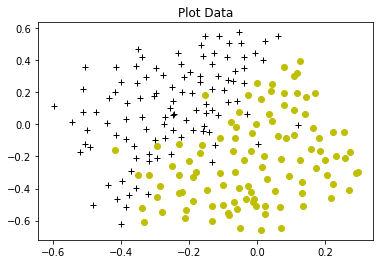

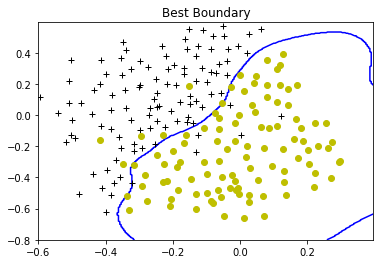

In [35]:
#using the best siama and C to draw boundary
sigma = 0.1
gamma = 1/(2*(sigma**2))

best_clf = svm.SVC(kernel = 'rbf',gamma = gamma,C = 1.0,decision_function_shape = 'ovr')
best_clf.fit(X,y.ravel())

plotData(X,y,"Plot Data")

x_1,x_2 = np.meshgrid(np.arange(-0.6,0.4,0.004),np.arange(-0.8,0.6,0.004))
Z = best_clf.predict(np.c_[x_1.ravel(),x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1,x_2,Z,[0.5],colors = 'b')
plotData(X, y, "Best Boundary")

In [37]:
#test training and test accuracy
clf_svm = svm.SVC(kernel = 'linear',C = 1,decision_function_shape = 'ovr')
clf_svm.fit(X,y.ravel())

train_acc = clf_svm.score(X,y.ravel())
test_acc = clf_svm.score(Xval,yval.ravel())

print(f'Training accuracy = {train_acc * 100}')
print(f'Test accuracy = {test_acc * 100}')

Training accuracy = 90.04739336492891
Test accuracy = 92.5


In [38]:
print("The best accuracy is:",test_acc*100)

The best accuracy is: 92.5


In [39]:
clf = svm.SVC(kernel='rbf', C = 1,gamma = 50)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)